### Post pruning graphs

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
corr_accs = np.array([60.52, 60.47, 60.65, 60.39, 59.86, 59])
corr_iters = [5, 5, 8, 18, 13]
decorr_accs = np.array([60.38, 60.31, 60.16, 60.6, 60.05, 60])
decorr_iters = [1, 6, 6, 6, 7]
percent = np.array([0, 10, 20, 30, 40, 50])

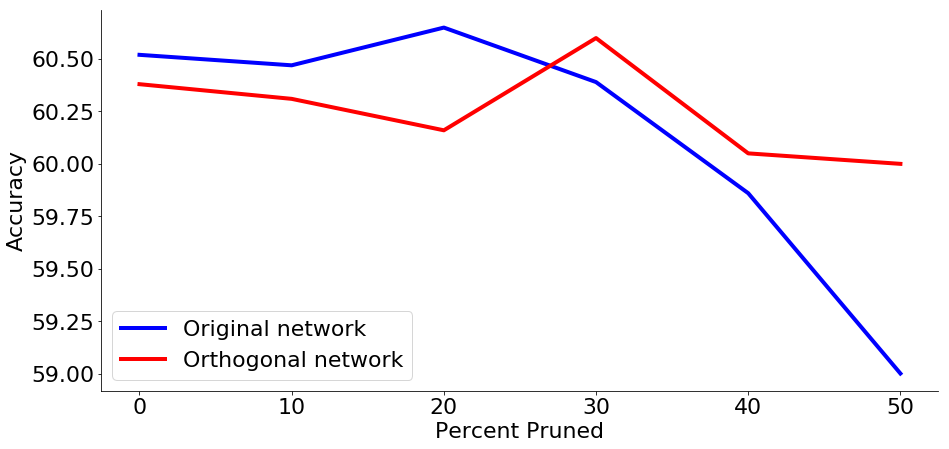

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))

plt.rcParams.update({'font.size': 22})
ax.plot(percent, corr_accs, label="Original network", color='b',linewidth=4)
ax.plot(percent, decorr_accs, label="Orthogonal network", color='r',linewidth=4)
plt.ylabel("Accuracy")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.hlines(y=60.9, xmin=10, xmax=70, color='r', linestyles='dashed', label="Accuracy of uncompressed, decorrelated net")
# plt.hlines(y=60.3, xmin=10, xmax=70, color='b', linestyles='dashed',  label="Accuracy of uncompressed, original net")
plt.xlabel("Percent Pruned")
plt.legend()
plt.savefig("acc.png")

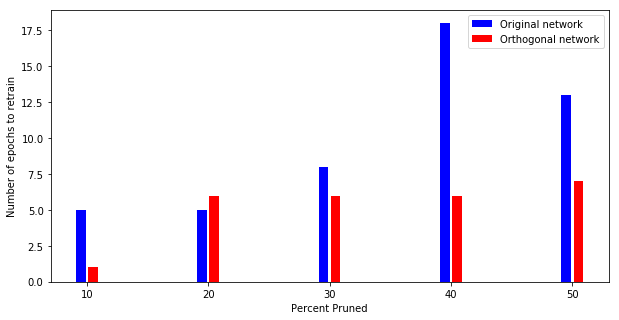

In [17]:
plt.figure(figsize=(10,5))
plt.bar(percent[1:]-0.5, corr_iters, label="Original network", color='b')
plt.bar(percent[1:]+0.5, decorr_iters, label="Orthogonal network", color='r')
plt.ylabel("Number of epochs to retrain")
plt.xlabel("Percent Pruned")
plt.legend()
plt.savefig("Number of epochs to retrain.png")

In [22]:
flops = np.array([0.229, 0.183, 0.15, 0.103, 0.079, 0.052])/0.229 * 100
params = np.array([8.08, 7.276, 5.831, 4.015, 3.116, 2.4])/8.08 * 100
times = 100 - np.array([0, 8.5, 20, 31, 41.5, 50])

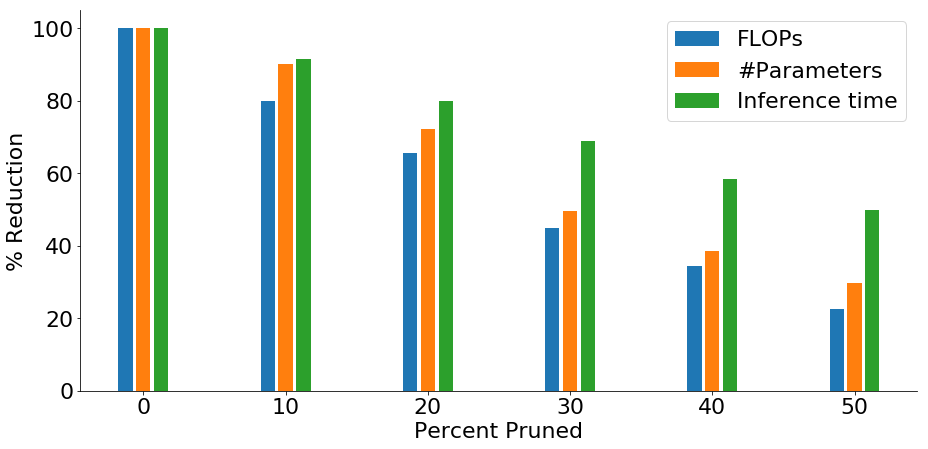

In [42]:
percent = np.array([0, 10, 20, 30, 40, 50])

fig, ax = plt.subplots(figsize=(15, 7))

plt.rcParams.update({'font.size': 22})
ax.bar(percent-1.25, flops, width=1, label="FLOPs")
ax.bar(percent, params, width=1, label="#Parameters")
ax.bar(percent+1.25, times, width=1, label="Inference time")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel("% Reduction")
plt.xlabel("Percent Pruned")
plt.legend()
plt.savefig("resource.png")

In [ ]:
orig_size = np.array([net.features[0].weight.shape[0], net.features[3].weight.shape[0], net.features[7].weight.shape[0], net.features[10].weight.shape[0], net.features[14].weight.shape[0], net.features[17].weight.shape[0], net.features[21].weight.shape[0], net.features[24].weight.shape[0], net.features[28].weight.shape[0], net.features[31].weight.shape[0]])
s = orig_size.sum()
prune_ratio = (6.5)*orig_size/sum(orig_size)
prune_ratio[0] = 0
print((prune_ratio*orig_size).sum()/s)
print(np.floor(prune_ratio*orig_size))
ratios.append(orig_size[1:] - np.floor(prune_ratio*orig_size)[1:])

In [22]:
ratios = []

In [23]:
plt.figure(figsize=(15,5))
for i in range(7):
    x = []
    for j in range(9):
        x.append(10*i + j - 4)
    barlist = plt.bar(np.array(x), ratios[i])
    barlist[0].set_color('tab:blue')
    barlist[1].set_color('tab:purple')
    barlist[2].set_color('tab:green')
    barlist[3].set_color('tab:orange')
    barlist[4].set_color('k')
    barlist[5].set_color('tab:cyan')
    barlist[6].set_color('tab:olive')
    barlist[7].set_color('tab:red')
    barlist[8].set_color('tab:gray')

for i in [7]:
    x = []
    for j in range(9):
        x.append(10*i + j - 4)
    barlist = plt.bar(np.array(x), ratios[i])
    barlist[0].set_color('tab:blue')
    barlist[0].set_label('Layer 1')
    barlist[1].set_color('tab:purple')
    barlist[1].set_label('Layer 2')
    barlist[2].set_color('tab:green')
    barlist[2].set_label('Layer 3')
    barlist[3].set_color('tab:orange')
    barlist[3].set_label('Layer 4')
    barlist[4].set_color('k')
    barlist[4].set_label('Layer 5')
    barlist[5].set_color('tab:cyan')
    barlist[5].set_label('Layer 6')
    barlist[6].set_color('tab:olive')
    barlist[6].set_label('Layer 7')
    barlist[7].set_color('tab:red')
    barlist[7].set_label('Layer 8')
    barlist[8].set_color('tab:gray')
    barlist[8].set_label('Layer 9')

    
plt.legend()
plt.ylabel("Number of neurons remaining in each layer")
plt.xlabel("Percent pruned")
# plt.savefig("Neurons remaining.png")

IndexError: list index out of range

<Figure size 1080x360 with 0 Axes>

In [ ]:
speedups = np.array([2, 9, 21, 35, 32, 35, 38])/100

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(percent, speedups)
plt.ylabel("Percent Speedup")
plt.xlabel("Percent Pruned")
plt.savefig("speedup.png")

### cal_w_mass

In [ ]:
l_temp = []

for layer_index in [3, 6, 10, 13, 17, 20, 24, 27, 31, 34]:
    
    _, _, w_in, h_in = net.features[0:layer_index](torch.zeros(1,3,32,32).to(device)).shape
    
    c_out, c_in, w_f, h_f = net.features[layer_index-3].weight.shape
    
    l_temp.append((c_in*w_f*h_f)*(w_in*h_in)*c_out*c_out*(c_in*w_f*h_f))
    
    
l_temp = np.array(l_temp)
l_temp = l_temp/l_temp.sum()

l_imp = {}
i = 0
for layer_index in [0, 3, 7, 10, 14, 17, 21, 24, 28, 31]:
    
    l_imp.update({layer_index : l_temp[i]})
    i+=1